In [2]:
from libs.mnist_reader import load_mnist
import matplotlib.pyplot as plt

def plot(path: str):
    # load original mnist data set train data
    X_train, Y_train = load_mnist(path=path, kind="train")

    # pick a sample to plot
    num = 6
    images = X_train[:num]
    labels = Y_train[:num]
    num_row = 3
    num_col = 2

    def get_label(index: int):
        if "fashion" in path:
            lables = {
                0: "T-shirt/top",
                1: "Trouser",
                2: "Pullover",
                3: "Dress",
                4: "Coat",
                5: "Sandal",
                6: "Shirt",
                7: "Sneaker",
                8: "Bag",
                9: "Ankle boot"
            }
            return lables[index]
        else:
            return f"Digit: {index}"

    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(images[i].reshape((28, 28)), cmap='gray')
        ax.set_title(f"{get_label(labels[i])}")
    plt.tight_layout()
    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False) 
    plt.show()

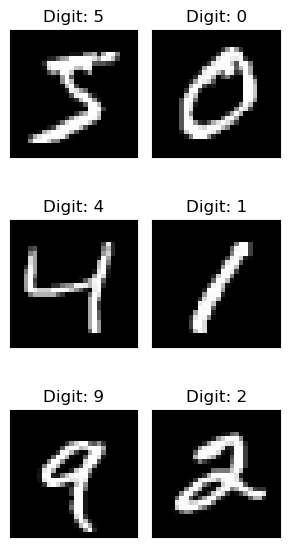

In [3]:
plot(path="data/mnist")

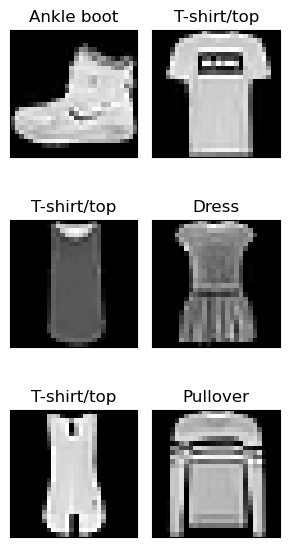

In [4]:
plot(path="data/fashion")

In [5]:
import numpy as np
from matplotlib import pyplot as plt 

def color_count(images: list) -> dict:
    color_count = dict.fromkeys( list(range(256)), 0)
    for image in images:
        image = image
        unique, counts = np.unique(image, return_counts=True)
        # # print(np.asarray((unique, counts)).T)
        image_dict = dict(zip(unique, counts))
        for index in range(len(color_count)):
            try:
                count = image_dict[index]
            except KeyError:
                count = 0
            color_count[index] += count
    return color_count
    

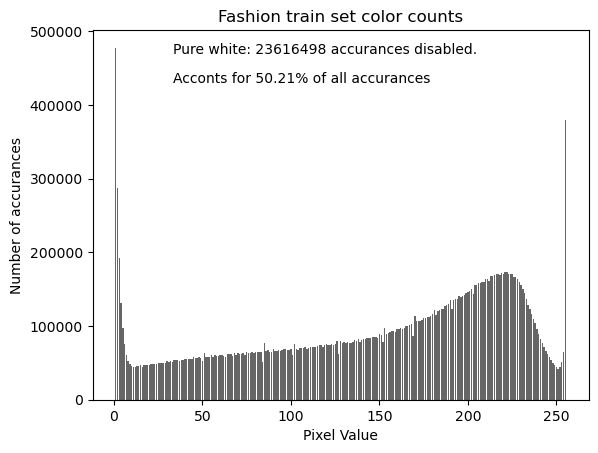

In [6]:
X_train, Y_train = load_mnist(path="data/fashion", kind="train")
fashion_counts = color_count(X_train)

plt.bar(list(fashion_counts.keys())[1:], list(fashion_counts.values())[1:], color='0.4')
plt.title("Fashion train set color counts")
plt.xlabel("Pixel Value")
plt.ylabel("Number of accurances")
plt.figtext(0.25, 0.83, f"Pure white: {fashion_counts[0]} accurances disabled.")
percent = "{:.2f}%".format(100*(fashion_counts[0]/sum(fashion_counts.values())))
plt.figtext(0.25, 0.77, f"Acconts for {percent} of all accurances")
plt.ticklabel_format(style='plain')

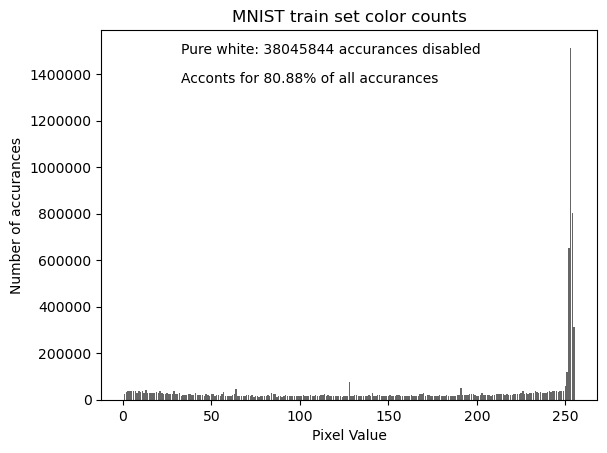

In [7]:
X_train, Y_train = load_mnist(path="data/mnist", kind="train")
mnist_conts = color_count(X_train)

plt.bar(list(mnist_conts.keys())[1:], list(mnist_conts.values())[1:], color='0.4')
plt.title("MNIST train set color counts")
plt.xlabel("Pixel Value")
plt.ylabel("Number of accurances")
plt.figtext(0.25, 0.83, f"Pure white: {mnist_conts[0]} accurances disabled")
percent = "{:.2f}%".format(100*(mnist_conts[0]/sum(mnist_conts.values())))
plt.figtext(0.25, 0.77, f"Acconts for {percent} of all accurances")
plt.ticklabel_format(style='plain')

In [16]:
import pandas as pd

X_train, _ = load_mnist(path="data/fashion", kind="train")
df = pd.DataFrame(X_train)

print(f"Number columns that have constant value in fashion dataset: {len(df.columns[df.nunique() <= 1])}")

X_train, _ = load_mnist(path="data/mnist", kind="train")
df = pd.DataFrame(X_train)

print(f"Number columns that have constant value in mnist dataset: {len(df.columns[df.nunique() <= 1])}")

Number columns that have constant value in fashion dataset: 0
Number columns that have constant value in mnist dataset: 67
